# Data Analysis - Follower Counts

## 1. Import Libraries & DataFrame

In [14]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import scipy.stats
from scipy.stats import stats
import statsmodels
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import (pairwise_tukeyhsd,
                                         MultiComparison)
%matplotlib inline

In [15]:
#Creating artist_codes dataframe
artists = pd.read_csv('Data/spotify_artists_cleaned.csv')

In [16]:
#Limiting artist data to follower counts under 25,000
#Decided on 25,000 after first examining outlier trends
artists = artists[(artists['artist_followers']<25000)]

In [17]:
#Preview DataFrame
print(artists.info())
artists.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45322 entries, 0 to 53243
Data columns (total 25 columns):
artist_id            45322 non-null object
artist_name          45322 non-null object
artist_genres        45322 non-null object
artist_followers     45322 non-null float64
artist_popularity    45322 non-null int64
blues                45322 non-null bool
children             45322 non-null bool
classical            45322 non-null bool
country              45322 non-null bool
edm                  45322 non-null bool
electronic           45322 non-null bool
folk                 45322 non-null bool
funk                 45322 non-null bool
hiphop               45322 non-null bool
indie                45322 non-null bool
jazz                 45322 non-null bool
latin                45322 non-null bool
pop                  45322 non-null bool
r&b                  45322 non-null bool
rap                  45322 non-null bool
reggae               45322 non-null bool
rock                

,artist_id,artist_name,artist_genres,artist_followers,artist_popularity,blues,children,classical,country,edm,...,jazz,latin,pop,r&b,rap,reggae,rock,soul,soundtrack,genre_count
0,4tN3rZ7cChj4Wns2Wt2Nj6,2 AM,"antiviralpop,kpop,minecraft",2075.0,41,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,1
1,3LsQKoRgMc8VEkQn66jfAQ,2:54,metropopolis,10158.0,19,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,1
2,733SPLVnEyXs6GxUEnJ7bx,11/5,"gfunk,hyphy",14489.0,29,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,1
4,1h2OVSKRdJHnVqyCKqCLkf,?uestlove,phillyrap,16178.0,34,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,1
6,2McJOiKebPtBGqyEYyZQFN,[:SITD:],"aggrotech,darkwave,ebm,electroindustrial,futur...",13580.0,36,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,1


## 2. Examine Follower Data

In [29]:
#Create dataframes filtered by pop, rock, hiphop, and country genres
pop_artists = artists[(artists['pop']==True)]
rock_artists = artists[(artists['rock']==True)]
hiphop_artists = artists[(artists['hiphop']==True)]
country_artists = artists[(artists['country']==True)]
#Print row counts
print('Pop Row Count:', len(pop_artists))
print('Rock Row Count:', len(rock_artists))
print('Hip-Hop Row Count:', len(hiphop_artists))
print('Country Row Count:', len(country_artists))

Pop Row Count: 10542
Rock Row Count: 5331
Hip-Hop Row Count: 3659
Country Row Count: 659


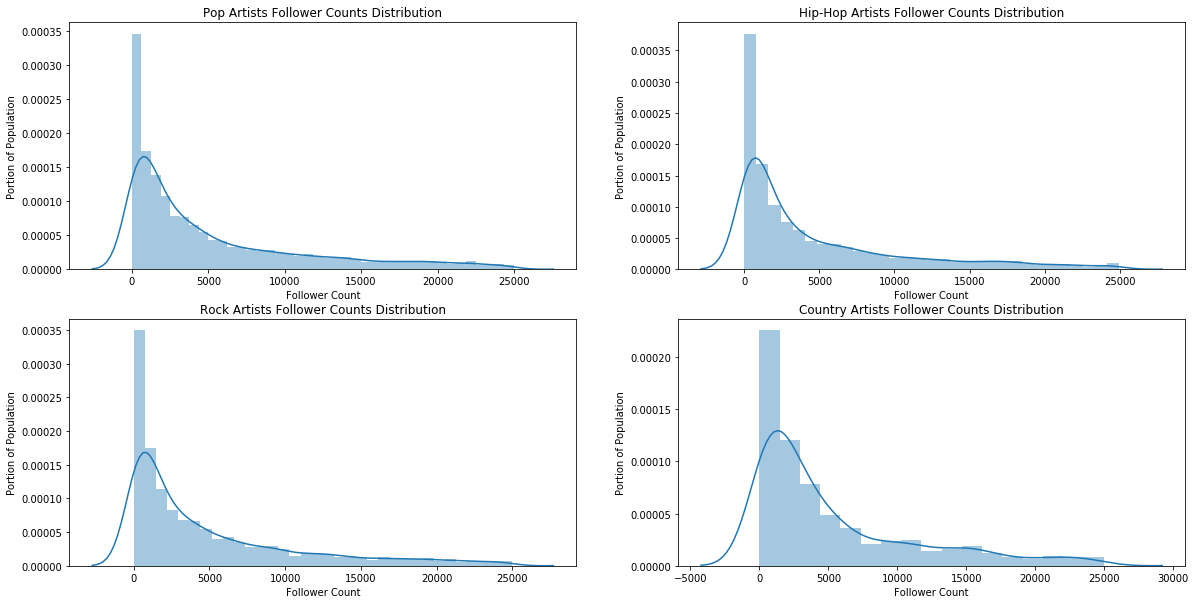

In [27]:
#Plot distributions of each genre
fig = plt.figure(figsize=(20,10))

ax1 = fig.add_subplot(2,2,1)
ax1 = sns.distplot(pop_artists.artist_followers, kde=True)
ax1.set_title('Pop Artists Follower Counts Distribution')
ax1.set_xlabel('Follower Count')
ax1.set_ylabel('Portion of Population')

ax2 = fig.add_subplot(2,2,2)
ax2 = sns.distplot(hiphop_artists.artist_followers, kde=True)
ax2.set_title('Hip-Hop Artists Follower Counts Distribution')
ax2.set_xlabel('Follower Count')
ax2.set_ylabel('Portion of Population')

ax3 = fig.add_subplot(2,2,3)
ax3 = sns.distplot(rock_artists.artist_followers, kde=True)
ax3.set_title('Rock Artists Follower Counts Distribution')
ax3.set_xlabel('Follower Count')
ax3.set_ylabel('Portion of Population')

ax4 = fig.add_subplot(2,2,4)
ax4 = sns.distplot(country_artists.artist_followers, kde=True)
ax4.set_title('Country Artists Follower Counts Distribution')
ax4.set_xlabel('Follower Count')
ax4.set_ylabel('Portion of Population')

plt.show()

In [20]:
#Test if datasets are normal
print(scipy.stats.normaltest(pop_artists.artist_followers))
print(scipy.stats.normaltest(hiphop_artists.artist_followers))
print(scipy.stats.normaltest(rock_artists.artist_followers))
print(scipy.stats.normaltest(country_artists.artist_followers))

NormaltestResult(statistic=2285.3626611252935, pvalue=0.0)
NormaltestResult(statistic=943.4773777685168, pvalue=1.3381059976347523e-205)
NormaltestResult(statistic=1303.0094956581415, pvalue=1.1352279732397582e-283)
NormaltestResult(statistic=158.34917457954157, pvalue=4.1201557457803653e-35)


In [21]:
#Create test sample array for each genre
hiphop_test_sample = np.array(hiphop_artists['artist_followers'].sample(500))
rock_test_sample = np.array(rock_artists['artist_followers'].sample(500))
pop_test_sample = np.array(pop_artists['artist_followers'].sample(500))
country_test_sample = np.array(country_artists['artist_followers'].sample(500))

In [22]:
#Create dataframe of test sample arrays
followers_test_sample_df = pd.DataFrame({"Hiphop": hiphop_test_sample,
                                         'Rock': rock_test_sample,
                                         'Pop': pop_test_sample,
                                         'Country': country_test_sample,
                                        })
followers_test_sample_df.head()

,Hiphop,Rock,Pop,Country
0,1436.0,2.0,2589.0,7183.0
1,7606.0,299.0,386.0,2954.0
2,1802.0,5909.0,341.0,46.0
3,7107.0,1640.0,1532.0,2931.0
4,119.0,23085.0,11423.0,2418.0


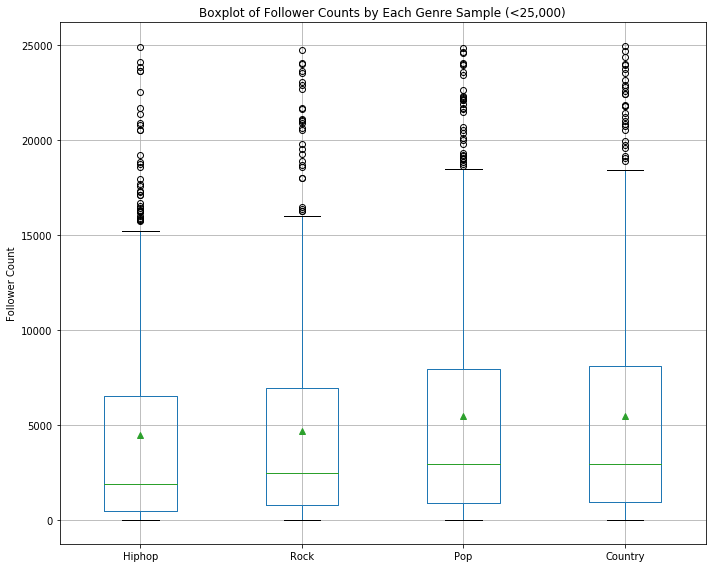

In [24]:
#Boxplot
fig1 = plt.figure(figsize=(10,8))
followers_test_sample_df.boxplot(showmeans=True)
plt.title('Boxplot of Follower Counts by Each Genre Sample (<25,000)')
plt.ylabel('Follower Count')
plt.tight_layout();

In [11]:
#Print means
print('Means of the samples are: ', 
      hiphop_test_sample.mean(), 
      rock_test_sample.mean(),
      pop_test_sample.mean(),
      country_test_sample.mean()
     )

Means of the samples are:  4903.264 5273.756 5315.064 4925.898


In [12]:
#Print standard deviation
print('STD of the samples are: ', 
      np.std(hiphop_test_sample), 
      np.std(rock_test_sample),
      np.std(pop_test_sample),
      np.std(country_test_sample)
     )

STD of the samples are:  5769.067887822434 6006.233429068837 5949.746550896434 5585.7170608254055


## 3. ANOVA Test

$H_{0}$: $\mu_{pop} = \mu_{rock} = \mu_{hiphop} = \mu_{country}$ 

All mean followers count of Pop, Rock, HipHop, and Country genres are equal.

$H_{a}$: not all means are equal.

$\alpha = 0.05$

In [30]:
#Taking a sample of 20% of the size of each genre dataframe
print('Hip-Hop Sample Size:', len(hiphop_artists)*.2)
print('Rock Sample Size:', len(rock_artists)*.2)
print('Pop Sample Size:', len(pop_artists)*.2)
print('Country Sample Size:', len(country_artists)*.2)

Hip-Hop Sample Size: 731.8000000000001
Rock Sample Size: 1066.2
Pop Sample Size: 2108.4
Country Sample Size: 131.8


In [58]:
#Create test sample array for each genre
hiphop_sample = np.array(hiphop_artists['artist_followers'].sample(732))
rock_sample = np.array(rock_artists['artist_followers'].sample(1066))
pop_sample = np.array(pop_artists['artist_followers'].sample(2108))
country_sample = np.array(country_artists['artist_followers'].sample(132))

In [15]:
#Print means
print('Means of the samples are: ', 
      hiphop_sample.mean(), 
      rock_sample.mean(),
      pop_sample.mean(),
      country_sample.mean()
     )

Means of the samples are:  4683.502732240438 5063.941838649156 5348.297438330171 4919.825757575758


In [16]:
#Print standard deviation
print('STD of the samples are: ', 
      np.std(hiphop_sample), 
      np.std(rock_sample),
      np.std(pop_sample),
      np.std(country_sample)
     )

STD of the samples are:  5903.6459218653645 5848.111399446156 6197.776186482969 5660.696920762538


In [33]:
# #Plot distributions of each sample
fig2 = plt.figure(figsize=(20,10))

ax1 = fig2.add_subplot(2,2,1)
ax1 = sns.distplot(pop_sample, kde=True)
ax1.set_title('Pop Sample Followers')
ax1.set_xlabel('Follower Count')
ax1.set_ylabel('Portion of Sample')

ax2 = fig2.add_subplot(2,2,2)
ax2 = sns.distplot(hiphop_sample, kde=True)
ax2.set_title('Hip Hop Sample Followers')
ax2.set_xlabel('Follower Count')
ax2.set_ylabel('Portion of Sample')

ax3 = fig2.add_subplot(2,2,3)
ax3 = sns.distplot(rock_sample, kde=True)
ax3.set_title('Rock Sample Followers')
ax3.set_xlabel('Follower Count')
ax3.set_ylabel('Portion of Sample')

ax4 = fig2.add_subplot(2,2,4)
ax4 = sns.distplot(country_sample, kde=True)
ax4.set_title('Country Sample Followers')
ax4.set_xlabel('Follower Count')
ax4.set_ylabel('Portion of Sample')

plt.show()

In [18]:
#Calculate ANOVA - defining variables

#List of samples
sample_list = [hiphop_sample,
               rock_sample, 
               pop_sample, 
               country_sample]

#Number of groups
k = len(sample_list)

#Sample size of each group
n1 = len(hiphop_sample)
n2 = len(rock_sample)
n3 = len(pop_sample)
n4 = len(country_sample)

#Total sample size
n = n1 + n2 + n3 + n4

#Concatenate all samples to an array
x_all = np.concatenate([hiphop_sample, 
                        rock_sample, 
                        pop_sample, 
                        country_sample])

#Mean for all groups combined
x_bar = x_all.mean()


In [19]:
#Calculate ANOVA - Sums of Squares
ss_between = np.sum([len(sample)*(sample.mean() - x_bar)**2 for sample in sample_list])
df_between = k - 1

ss_within = np.sum([((sample - sample.mean())**2).sum() for sample in sample_list])
df_within = n - k

ss_total = np.sum([((sample - x_bar)**2).sum() for sample in sample_list])
df_total = n - 1


In [20]:
#Calculate ANOVA - F-Score
ms_between = ss_between / df_between
ms_within = ss_within / df_within

f_score = ms_between / ms_within
print('F-Score:', f_score)

F-Score: 2.3441085316498613


In [21]:
#Calculate ANOVA - P-Value
p_value = 1 - scipy.stats.f.cdf(f_score, df_between, df_within)
print('P-Value:', p_value)

P-Value: 0.07103982755724314


In [22]:
#Checking ANOVA results with a stats package
F_statistic, pVal = stats.f_oneway(hiphop_sample,
                                   rock_sample, 
                                   pop_sample, 
                                   country_sample)
print('F-Score:', F_statistic)
print('P-Value:', pVal)

F-Score: 2.3441085316498635
P-Value: 0.07103982755724335


## 4. Tukey's Test

$H_{0}$: $\mu_{1} = \mu_{2}$ 

Mean followers count of each pairwise combination of Pop, Rock, HipHop, and Country genres are equal.

$H_{a}$: $\mu_{1} ≠ \mu_{2}$

$\alpha = 0.05$


This method tests at P<0.05 (correcting for the fact that multiple comparisons are being made which would normally increase the probability of a significant difference being identified). A results of ’reject = True’ means that a significant difference has been observed.

In [23]:
#Create DataFrame that concatenates each sample array
hiphop_df = pd.DataFrame(hiphop_sample)
hiphop_df = hiphop_df.rename(columns={0: 'followers'})
hiphop_df['genre'] = 'hiphop'
hiphop_df['id'] = 0

rock_df = pd.DataFrame(rock_sample)
rock_df = rock_df.rename(columns={0: 'followers'})
rock_df['genre'] = 'rock'
rock_df['id'] = 1

pop_df = pd.DataFrame(pop_sample)
pop_df = pop_df.rename(columns={0: 'followers'})
pop_df['genre'] = 'pop'
pop_df['id'] = 2

country_df = pd.DataFrame(country_sample)
country_df = country_df.rename(columns={0: 'followers'})
country_df['genre'] = 'country'
country_df['id'] = 3

combined_sample_df = pd.concat([hiphop_df, 
                                rock_df, 
                                pop_df, 
                                country_df], axis=0)

In [24]:
#Perform Tukey Test
MultiComp = MultiComparison(combined_sample_df['followers'],
                            combined_sample_df['genre'])
print(MultiComp.tukeyhsd().summary())

    Multiple Comparison of Means - Tukey HSD, FWER=0.05    
 group1 group2  meandiff p-adj    lower      upper   reject
-----------------------------------------------------------
country hiphop  -236.323    0.9 -1704.2696 1231.6236  False
country    pop  428.4717 0.8414  -964.3568 1821.3001  False
country   rock  144.1161    0.9 -1288.2655 1576.4977  False
 hiphop    pop  664.7947 0.0506    -1.1899 1330.7793  False
 hiphop   rock  380.4391 0.5487   -364.733 1125.6112  False
    pop   rock -284.3556 0.5821  -867.7811  299.0699  False
-----------------------------------------------------------


## 5. Levene Test

Perform Levene test for equal variances. The Levene test tests the null hypothesis that all input samples are from populations with equal variances. Levene’s test is an alternative to Bartlett’s test bartlett in the case where there are significant deviations from normality.

$H_{0}$: $s_{genre 1} = s_{genre2}$ 

Genre1 sample variance is equal to genre2 sample variance.

$H_{a}$: $s_{genre 1} ≠ s_{genre2}$

Genre1 sample variance is not equal to genre2 sample variance.

$\alpha = 0.05$

Performed test for each pairwise combination of the four selected genres.

In [69]:
#Levene test for each pairwise combination of 2 genres
print('Hiphop-Pop:', scipy.stats.levene(hiphop_sample, pop_sample, center='mean'))
print('Rock-Pop:', scipy.stats.levene(rock_sample, pop_sample, center='mean'))
print('Country-Pop:', scipy.stats.levene(country_sample, pop_sample, center='mean'))
print('Hiphop-Country:', scipy.stats.levene(hiphop_sample, country_sample, center='mean'))
print('Hiphop-Rock:', scipy.stats.levene(hiphop_sample, rock_sample, center='mean'))
print('Country-Rock:', scipy.stats.levene(country_sample, rock_sample, center='mean'))

Hiphop-Pop: LeveneResult(statistic=5.995707814785892, pvalue=0.014400843123880454)
Rock-Pop: LeveneResult(statistic=5.47455792287926, pvalue=0.019356952189196714)
Country-Pop: LeveneResult(statistic=2.4182195498337515, pvalue=0.12007256418043154)
Hiphop-Country: LeveneResult(statistic=0.1286938406685831, pvalue=0.7198780161627283)
Hiphop-Rock: LeveneResult(statistic=0.153138745534484, pvalue=0.6956001468977933)
Country-Rock: LeveneResult(statistic=0.34819128141384115, pvalue=0.5552502570088169)


## 6. Welch's T-Test

$H_{0}$: $\mu_{genre1} <= \mu_{genre2}$ 

Mean followers count of genre 1 are less than or equal to mean follower count of genre 2.

$H_{a}$: $\mu_{genre1} > \mu_{genre2}$

Mean follower count of genre 1 is greater than mean follower count of genre 2.

$\alpha = 0.05$

Performed test for each pairwise combination of the four selected genres.

In [62]:
#Print sample means for each genre
print('Pop Sample Mean:', pop_sample.mean())
print('Hip-Hop Sample Mean:', hiphop_sample.mean())
print('Rock Sample Mean:', rock_sample.mean())
print('Country Sample Mean:', country_sample.mean())

Pop Sample Mean: 5348.297438330171
Hip-Hop Sample Mean: 4683.502732240438
Rock Sample Mean: 5063.941838649156
Country Sample Mean: 4919.825757575758


In [72]:
#T-test comparing pop and hiphop follower count means
phh_ttest = scipy.stats.ttest_ind(pop_sample, hiphop_sample, equal_var=False)
print('Pop-Hiphop:', phh_ttest)

#T-test comparing pop and rock follower count means
pr_ttest = scipy.stats.ttest_ind(pop_sample, rock_sample, equal_var=False)
print('Pop-Rock:', pr_ttest)

#T-test comparing pop and country follower count means
pc_ttest = scipy.stats.ttest_ind(pop_sample, country_sample, equal_var=False)
print('Pop-Country:', pc_ttest)

#T-test comparing hiphop and rock follower count means
hhr_ttest = scipy.stats.ttest_ind(hiphop_sample, rock_sample, equal_var=False)
print('Hiphop-Rock:', hhr_ttest)

#T-test comparing hiphop and country follower count means
hhc_ttest = scipy.stats.ttest_ind(hiphop_sample, country_sample, equal_var=False)
print('Hiphop-Country:', hhc_ttest)

#T-test comparing rock and country follower count means
rc_ttest = scipy.stats.ttest_ind(rock_sample, country_sample, equal_var=False)
print('Rock-Country:', rc_ttest)

Pop-Hiphop: Ttest_indResult(statistic=2.5894871505262214, pvalue=0.009716884375528388)
Pop-Rock: Ttest_indResult(statistic=1.2673257613967972, pvalue=0.2051699353654967)
Pop-Country: Ttest_indResult(statistic=0.8357537452424814, pvalue=0.4046121912229924)
Hiphop-Rock: Ttest_indResult(statistic=-1.3468104813080806, pvalue=0.17823674930397115)
Hiphop-Country: Ttest_indResult(statistic=-0.43712183916800496, pvalue=0.6625306632339363)
Rock-Country: Ttest_indResult(statistic=0.27396323622436314, pvalue=0.7844508335081797)


According to the documentation for stats.ttest_ind() the output returned is for a two-tailed t-test. Therefore we must divide the p-value by 2 for a one-tailed test. 

In [66]:
#T-test result p-values divided by 2 for one-tailed test
print('Pop_Hiphop One-Tail P-Value:', phh_ttest.pvalue/2)
print('Pop_Rock One-Tail P-Value:',pr_ttest.pvalue/2)
print('Pop_Country One-Tail P-Value:',pc_ttest.pvalue/2)
print('Hiphop_Rock One-Tail P-Value:',hhr_ttest.pvalue/2)
print('Hiphop_Country One-Tail P-Value:',hhc_ttest.pvalue/2)
print('Rock_Country One-Tail P-Value:',rc_ttest.pvalue/2)

Pop_Hiphop One-Tail P-Value: 0.004858442187764194
Pop_Rock One-Tail P-Value: 0.10258496768274834
Pop_Country One-Tail P-Value: 0.2023060956114962
Hiphop_Rock One-Tail P-Value: 0.08911837465198558
Hiphop_Country One-Tail P-Value: 0.33126533161696814
Rock_Country One-Tail P-Value: 0.39222541675408984
